# Modeling PV Array Performance with PVLIB 

* [PVSC 48 Python Tutorial](https://pvsc-python-tutorials.github.io/PVSC48-Python-Tutorial/Tutorial%200%20-%20Overview.html)

* https://pvlib-python.readthedocs.io/en/latest/user_guide/introtutorial.html


In [12]:
# Enable Intellisense (auto-completetion, dot help, etc.)
#%config IPCompleter.greedy=True

In [13]:
import os  # for getting environment variables
import pathlib  # for finding the example dataset
import pvlib
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization

In [14]:
!python --version

Python 3.10.5


In [15]:
print(pvlib.__version__)

0.9.1


In [16]:
# From PVSC 48 Python Tutorial. The NOAA TMY3 file format by differs from PVGIS TMY file format.
# DATA_DIR = pathlib.Path(pvlib.__file__).parent / 'data'
# df_tmy, meta_dict = pvlib.iotools.read_tmy3(DATA_DIR / '723170TYA.CSV', coerce_year=1990)
# meta_dict  # display the dictionary of metadata

In [17]:
# PVGIS TMY
tmy_pfname = r"./data/PVGIS_SARAH2/tmy_51.498_6.549_2005_2020.csv"

In [18]:
#pvlib.iotools.read_tmy3(pfname)
pvgis_tmy_tuple = pvlib.iotools.read_pvgis_tmy(tmy_pfname, map_variables=True)

In [19]:
type(pvgis_tmy_tuple)

tuple

In [20]:
df_tmy = pvgis_tmy_tuple[0]
df_tmy.head(5)

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2005-01-01 00:00:00+00:00,5.77,93.25,0.0,-0.0,0.0,206.72,2.64,291.0,102063.0
2005-01-01 01:00:00+00:00,5.77,93.51,0.0,-0.0,0.0,203.53,2.60,287.0,102093.0
2005-01-01 02:00:00+00:00,5.77,93.77,0.0,-0.0,0.0,200.33,2.57,282.0,102202.0
2005-01-01 03:00:00+00:00,5.77,94.03,0.0,-0.0,0.0,197.13,2.54,277.0,102202.0
2005-01-01 04:00:00+00:00,5.77,94.29,0.0,-0.0,0.0,193.94,2.51,270.0,102192.0


In [33]:
old_names = ["ghi", "dhi", "dni", "temp_air", "wind_speed"]
new_names = ["GHI", "DHI", "DNI", "DryBulb", "Wspd"]
translate = {a:b for a,b in zip(old_names, new_names)}
translate

{'ghi': 'GHI',
 'dhi': 'DHI',
 'dni': 'DNI',
 'temp_air': 'DryBulb',
 'wind_speed': 'Wspd'}

In [34]:
df = df_tmy[old_names].rename(columns = translate)
df.head()

,GHI,DHI,DNI,DryBulb,Wspd
time(UTC),,,,,
2005-01-01 00:00:00+00:00,0.0,0.0,-0.0,5.77,2.64
2005-01-01 01:00:00+00:00,0.0,0.0,-0.0,5.77,2.60
2005-01-01 02:00:00+00:00,0.0,0.0,-0.0,5.77,2.57
2005-01-01 03:00:00+00:00,0.0,0.0,-0.0,5.77,2.54
2005-01-01 04:00:00+00:00,0.0,0.0,-0.0,5.77,2.51


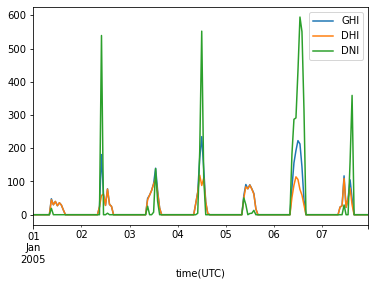

In [36]:
fig1, ax1 = plt.subplots()
first_week = df.head(24*7)  # Plotting 7 days, each one has 24 hours or entries
first_week[['GHI', 'DHI', 'DNI']].plot(ax = ax1)
plt.show()

In [42]:
24*365

8760

In [45]:
df.iloc[3]

GHI        0.00
DHI        0.00
DNI       -0.00
DryBulb    5.77
Wspd       2.54
Name: 2005-01-01 03:00:00+00:00, dtype: float64

In [46]:
df['GHI'].resample('M').sum()

time(UTC)
2005-01-31 00:00:00+00:00    22969.0
2005-02-28 00:00:00+00:00        0.0
2005-03-31 00:00:00+00:00        0.0
2005-04-30 00:00:00+00:00        0.0
2005-05-31 00:00:00+00:00        0.0
                              ...   
2018-11-30 00:00:00+00:00        0.0
2018-12-31 00:00:00+00:00        0.0
2019-01-31 00:00:00+00:00        0.0
2019-02-28 00:00:00+00:00        0.0
2019-03-31 00:00:00+00:00    73376.0
Freq: M, Name: GHI, Length: 171, dtype: float64